# Lab 3

In [31]:
import pandas as pd

df = pd.read_csv('Dataset\heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [32]:
#Data set describe
print("Data set describe:\n")
df.describe()

Data set describe:



,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [33]:
#Data set rows
print("Data set rows and columns:\n")
df.shape 

Data set rows and columns:



(303, 14)

1) Check missing values

In [34]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


2) Data Cleaning (Handling Outliers)

In [35]:
from scipy.stats import zscore

# Applying Z-score for specific columns
z_score_cols = ['age', 'trtbps', 'chol', 'thalachh']
z_scores = df[z_score_cols].apply(zscore)

print("Rows with Z-scores > 3\n", z_scores[(z_scores > 3).any(axis=1)])

# Only keep rows with Z-scores less than 3 for the specified columns
df_no_outliers_z = df[(z_scores < 3).all(axis=1)]

print("Removed outliers:\n", len(df) - len(df_no_outliers_z))

# Update the original DataFrame
df = df_no_outliers_z

Rows with Z-scores > 3
           age    trtbps      chol  thalachh
28   1.172774  0.478391  3.299555  0.321556
85   1.393352 -0.949431  6.140401  0.452748
220  0.952197  1.049520  3.106300  0.190365
223  0.180175  3.905165  0.806568 -0.727976
246  0.180175  0.135714  3.144951  0.015443
248 -0.040403  3.448262  0.709940  1.983316
Removed outliers:
 6


In [36]:
#Data set describe
print("Data set describe:\n")
df.describe()

Data set describe:



,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.00000,297.000000
mean,54.249158,0.693603,0.969697,131.148148,243.265993,0.144781,0.538721,149.474747,0.326599,1.019192,1.404040,0.713805,2.30303,0.548822
std,9.107756,0.461775,1.034420,16.827170,45.881530,0.352474,0.525706,22.951186,0.469761,1.143845,0.613792,1.017870,0.61162,0.498451
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.00000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.700000,1.000000,0.000000,2.00000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,273.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.00000,1.000000
max,77.000000,1.000000,3.000000,180.000000,394.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.00000,1.000000


In [37]:
#Data set rows
print("Data set rows and columns:\n")
df.shape 

Data set rows and columns:



(297, 14)

3) Feature Encoding (Converting Categorical Variables to Numeric)

In [38]:
columns = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
for column in columns:
    print(f"Unique values in '{column}': {df[column].unique()}")
    print(f"Number of different values in '{column}': {len(df[column].unique())}")


Unique values in 'age': [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 53 65
 46 45 39 47 62 34 35 29 55 60 68 67 74 76 70 38 77]
Number of different values in 'age': 41
Unique values in 'sex': [1 0]
Number of different values in 'sex': 2
Unique values in 'cp': [3 2 1 0]
Number of different values in 'cp': 4
Unique values in 'trtbps': [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 165 174 144 123 154 114 164]
Number of different values in 'trtbps': 47
Unique values in 'chol': [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 197 198 177 273 213 304 232 269 360 308 245 208
 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309 186
 203 183 220 209 258 227 261 221 205 240 318 298 277 214 248 255 207 223
 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271 268 267
 210 295 306 178 2

In [39]:
from sklearn.preprocessing import OneHotEncoder

# Example of one-hot encoding for 'cp' (chest pain type)
df_encoded = pd.get_dummies(df, columns=['cp','fbs','slp', 'caa', 'thall', 'restecg'], drop_first=True)

# Display the updated DataFrame with encoded features
df = df_encoded
df.head()


,age,sex,trtbps,chol,thalachh,exng,oldpeak,output,cp_1,cp_2,...,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3,restecg_1,restecg_2
0,63,1,145,233,150,0,2.3,1,False,False,...,False,False,False,False,False,True,False,False,False,False
1,37,1,130,250,187,0,3.5,1,False,True,...,False,False,False,False,False,False,True,False,True,False
2,41,0,130,204,172,0,1.4,1,True,False,...,True,False,False,False,False,False,True,False,False,False
3,56,1,120,236,178,0,0.8,1,True,False,...,True,False,False,False,False,False,True,False,True,False
4,57,0,120,354,163,1,0.6,1,False,False,...,True,False,False,False,False,False,True,False,True,False


In [40]:
#print df colmns
print("Data set columns:\n", df.columns)

Data set columns:
 Index(['age', 'sex', 'trtbps', 'chol', 'thalachh', 'exng', 'oldpeak', 'output',
       'cp_1', 'cp_2', 'cp_3', 'fbs_1', 'slp_1', 'slp_2', 'caa_1', 'caa_2',
       'caa_3', 'caa_4', 'thall_1', 'thall_2', 'thall_3', 'restecg_1',
       'restecg_2'],
      dtype='object')


In [41]:
#Data set describe
df.describe()

,age,sex,trtbps,chol,thalachh,exng,oldpeak,output
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.249158,0.693603,131.148148,243.265993,149.474747,0.326599,1.019192,0.548822
std,9.107756,0.461775,16.827170,45.881530,22.951186,0.469761,1.143845,0.498451
min,29.000000,0.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,120.000000,211.000000,133.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,152.000000,0.000000,0.700000,1.000000
75%,61.000000,1.000000,140.000000,273.000000,166.000000,1.000000,1.600000,1.000000
max,77.000000,1.000000,180.000000,394.000000,202.000000,1.000000,6.200000,1.000000


In [42]:
#Data set rows
print("Data set rows and columns:\n")
df.shape

Data set rows and columns:



(297, 23)

4) Feature Scaling (Standardizing or Normalizing Features)

In [43]:
from sklearn.preprocessing import StandardScaler

# Instantiate the scaler
scaler = StandardScaler()

# Select numerical features
numerical_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

# Standardize the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the scaled features
df.head()


,age,sex,trtbps,chol,thalachh,exng,oldpeak,output,cp_1,cp_2,...,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3,restecg_1,restecg_2
0,0.962434,1,0.824573,-0.224128,0.022924,0,1.121629,1,False,False,...,False,False,False,False,False,True,False,False,False,False
1,-1.897094,1,-0.068347,0.147017,1.637762,0,2.172494,1,False,True,...,False,False,False,False,False,False,True,False,True,False
2,-1.457167,0,-0.068347,-0.857257,0.983098,0,0.333481,1,True,False,...,True,False,False,False,False,False,True,False,False,False
3,0.192561,1,-0.663627,-0.158632,1.244964,0,-0.191951,1,True,False,...,True,False,False,False,False,False,True,False,True,False
4,0.302543,0,-0.663627,2.417550,0.590300,1,-0.367095,1,False,False,...,True,False,False,False,False,False,True,False,True,False


In [44]:
#Df describe
df.describe()

,age,sex,trtbps,chol,thalachh,exng,oldpeak,output
count,2.970000e+02,297.000000,2.970000e+02,2.970000e+02,2.970000e+02,297.000000,2.970000e+02,297.000000
mean,1.196200e-17,0.693603,-2.631640e-16,-1.794300e-16,-5.741759e-16,0.326599,-2.153160e-16,0.548822
std,1.001688e+00,0.461775,1.001688e+00,1.001688e+00,1.001688e+00,0.469761,1.001688e+00,0.498451
min,-2.776949e+00,0.000000,-2.211355e+00,-2.560157e+00,-3.424973e+00,0.000000,-8.925269e-01,0.000000
25%,-7.972757e-01,0.000000,-6.636270e-01,-7.044327e-01,-7.190283e-01,0.000000,-8.925269e-01,0.000000
50%,8.257896e-02,1.000000,-6.834696e-02,-7.130332e-02,1.102128e-01,0.000000,-2.795228e-01,1.000000
75%,7.424700e-01,1.000000,5.269330e-01,6.491543e-01,7.212326e-01,1.000000,5.086253e-01,1.000000
max,2.502179e+00,1.000000,2.908053e+00,3.290832e+00,2.292426e+00,1.000000,4.536938e+00,1.000000


5) Data Splitting (Train-Test Split)

In [45]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.drop(columns=['output'])
y = df['output']

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X Train and test set sizes:", X_train.shape, X_test.shape)
print("y Train and test set sizes:", y_train.shape, y_test.shape)


X Train and test set sizes: (237, 22) (60, 22)
y Train and test set sizes: (237,) (60,)


In [46]:
print('X train head:\n',X_train.head())
print('\ny trin head:\n', y_train.head())

X train head:
           age  sex    trtbps      chol  thalachh  exng   oldpeak   cp_1  \
279  0.742470    1  0.407877 -1.686875 -1.068182     1  2.260066  False   
265  1.292379    1 -1.139851 -0.682601 -0.762673     1 -0.804955  False   
31   1.182397    1 -0.663627 -1.446722 -0.413518     0 -0.542239  False   
22  -1.347185    1  0.526933 -0.376952  1.244964     0 -0.892527  False   
283 -1.567149    1  1.241269 -0.442448  1.375897     0 -0.892527  False   

      cp_2   cp_3  ...  slp_2  caa_1  caa_2  caa_3  caa_4  thall_1  thall_2  \
279  False  False  ...  False   True  False  False  False    False     True   
265  False  False  ...   True   True  False  False  False    False     True   
31   False  False  ...   True  False  False  False  False    False    False   
22   False  False  ...   True  False  False  False  False    False     True   
283  False  False  ...   True  False  False  False  False    False    False   

     thall_3  restecg_1  restecg_2  
279    False      Fals

In [47]:
print('X test head:\n',X_test.head())
print('\ny test head:\n', y_test.head())

X test head:
           age  sex    trtbps      chol  thalachh  exng   oldpeak   cp_1  \
169 -0.137385    1  0.526933 -0.879089  0.241146     1  1.822206  False   
213  0.742470    0  0.824573  1.391444 -0.151653     1 -0.016807  False   
64   0.412524    1  0.526933 -0.704433  0.677588     0 -0.892527  False   
156 -0.797276    1 -0.068347  0.212513  1.288608     0 -0.892527  False   
5    0.302543    1  0.526933 -1.119242 -0.064364     0 -0.542239  False   

      cp_2   cp_3  ...  slp_2  caa_1  caa_2  caa_3  caa_4  thall_1  thall_2  \
169  False  False  ...  False  False  False  False  False    False    False   
213  False  False  ...  False  False  False  False  False    False    False   
64    True  False  ...   True  False  False  False  False    False     True   
156   True  False  ...   True  False  False  False  False    False     True   
5    False  False  ...  False  False  False  False  False     True    False   

     thall_3  restecg_1  restecg_2  
169     True      False

# Lab 4

## Feature Selection

### 1) Filter Method : Correlation Analysis

Correlation with target variable:

output       1.000000
thall_2      0.547795
thalachh     0.444715
slp_2        0.379803
cp_2         0.311025
cp_1         0.253966
restecg_1    0.127327
caa_4        0.103602
cp_3         0.090186
restecg_2   -0.008207
fbs_1       -0.020290
chol        -0.080156
trtbps      -0.123099
thall_1     -0.144907
caa_3       -0.226534
age         -0.229688
caa_1       -0.231408
caa_2       -0.273208
sex         -0.327221
slp_1       -0.353575
oldpeak     -0.433342
exng        -0.449303
thall_3     -0.499312
Name: output, dtype: float64

Features with positive correlation:
thall_2      0.547795
thalachh     0.444715
slp_2        0.379803
cp_2         0.311025
cp_1         0.253966
restecg_1    0.127327
caa_4        0.103602
cp_3         0.090186
Name: output, dtype: float64

Selected features with positive correlation above threshold (0.1):
thall_2: 0.5478
thalachh: 0.4447
slp_2: 0.3798
cp_2: 0.3110
cp_1: 0.2540
restecg_1: 0.1273
caa_4: 0.1036


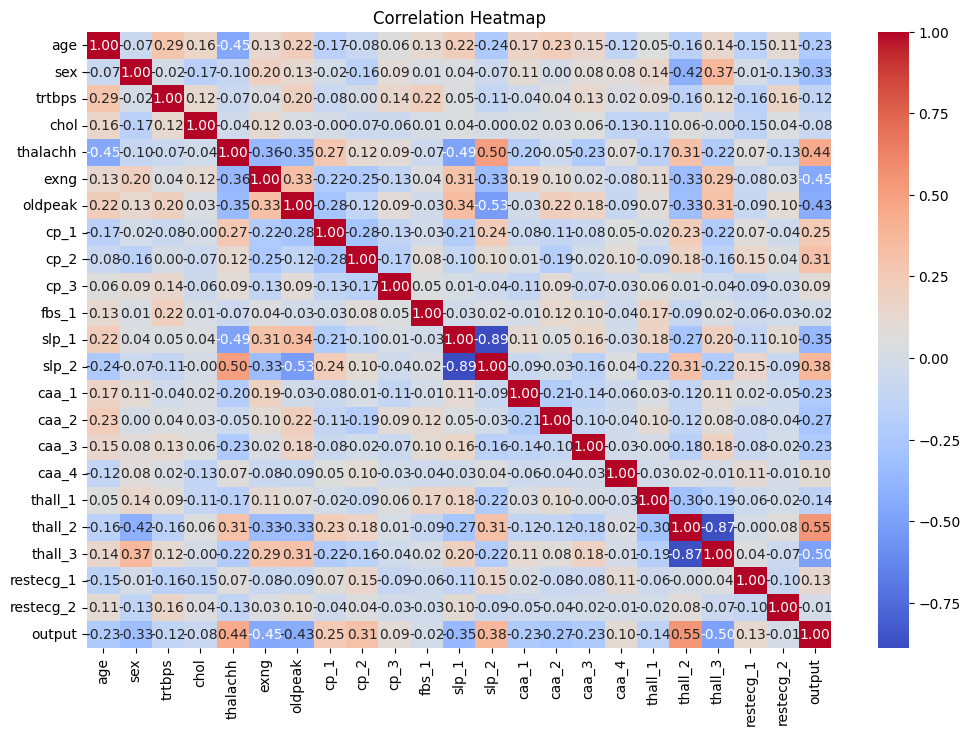


Final Selected Features with Positive Correlation:
['thall_2', 'thalachh', 'slp_2', 'cp_2', 'cp_1', 'restecg_1', 'caa_4']


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def correlation_analysis_positive(X_train, y_train):
    # Combine X_train and y_train for correlation
    Xy_train = pd.concat([X_train, y_train], axis=1)
    correlation_matrix = Xy_train.corr()
    
    # Correlation with the target variable
    target_corr = correlation_matrix[y_train.name].sort_values(ascending=False)
    print("Correlation with target variable:\n")
    print(target_corr)
    
    # Filter only positive correlations
    positive_corr = target_corr[target_corr > 0].drop(y_train.name, errors='ignore')
    print("\nFeatures with positive correlation:")
    print(positive_corr)
    
    # Select features with correlation above a threshold
    threshold = 0.1
    selected_features = positive_corr[positive_corr > threshold].index.tolist()
    
    print("\nSelected features with positive correlation above threshold (0.1):")
    for feature, value in positive_corr.items():
        if value > threshold:
            print(f"{feature}: {value:.4f}")
    
    # Plot the correlation heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()
    
    return selected_features

# Apply the method
selected_features_corr = correlation_analysis_positive(X_train, y_train)
print("\nFinal Selected Features with Positive Correlation:")
print(selected_features_corr)


### 2) Embedded Method: Decision Tree Feature Importance

In [49]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

def decision_tree_importance_filtered(X_train, y_train, threshold=0.01):
    # Train Decision Tree
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    # Get feature importances
    importances = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': model.feature_importances_
    }).sort_values(by='Importance', ascending=False)
    
    print("Feature Importance using Decision Tree:")
    print(importances)
    
    # Filter features based on threshold
    selected_features = importances[importances['Importance'] > threshold]['Feature'].tolist()
    print(f"Selected features with importance > {threshold}:")
    print(selected_features)
    
    return selected_features

# Apply the method with threshold > 0.01
selected_dt_features_filtered = decision_tree_importance_filtered(X_train, y_train, threshold=0.01)
selected_features_dt = set(selected_dt_features_filtered)


Feature Importance using Decision Tree:
      Feature  Importance
18    thall_2    0.300079
4    thalachh    0.111597
0         age    0.105383
3        chol    0.091409
6     oldpeak    0.088077
2      trtbps    0.076194
1         sex    0.040518
8        cp_2    0.036294
9        cp_3    0.036106
13      caa_1    0.025819
12      slp_2    0.023627
20  restecg_1    0.022682
14      caa_2    0.020251
10      fbs_1    0.013459
17    thall_1    0.008506
19    thall_3    0.000000
11      slp_1    0.000000
16      caa_4    0.000000
15      caa_3    0.000000
7        cp_1    0.000000
5        exng    0.000000
21  restecg_2    0.000000
Selected features with importance > 0.01:
['thall_2', 'thalachh', 'age', 'chol', 'oldpeak', 'trtbps', 'sex', 'cp_2', 'cp_3', 'caa_1', 'slp_2', 'restecg_1', 'caa_2', 'fbs_1']


### 3) Embedded Method: Lasso Regression

In [50]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import pandas as pd

def lasso_selection(X_train, y_train):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_train)
    model = Lasso(alpha=0.01, random_state=42)
    model.fit(X_scaled, y_train)
    coefficients = pd.DataFrame({
        'Feature': X_train.columns,
        'Coefficient': model.coef_
    }).sort_values(by='Coefficient', ascending=False)
    print("Feature Coefficients using Lasso:")
    print(coefficients)
    return coefficients[coefficients['Coefficient'] != 0]['Feature'].tolist()


selected_lasso_features = lasso_selection(X_train, y_train)
print("Selected features based on Lasso Regression:")
print(selected_lasso_features)
selected_features_lasso = set(selected_lasso_features)

Feature Coefficients using Lasso:
      Feature  Coefficient
18    thall_2     0.085906
8        cp_2     0.084227
4    thalachh     0.058098
9        cp_3     0.048733
7        cp_1     0.045289
20  restecg_1     0.013109
0         age     0.008619
16      caa_4     0.007680
12      slp_2     0.004874
10      fbs_1     0.003367
17    thall_1    -0.000000
21  restecg_2    -0.000804
2      trtbps    -0.007443
3        chol    -0.016344
11      slp_1    -0.023144
19    thall_3    -0.040492
5        exng    -0.045859
1         sex    -0.056815
15      caa_3    -0.057436
6     oldpeak    -0.062619
13      caa_1    -0.084246
14      caa_2    -0.097319
Selected features based on Lasso Regression:
['thall_2', 'cp_2', 'thalachh', 'cp_3', 'cp_1', 'restecg_1', 'age', 'caa_4', 'slp_2', 'fbs_1', 'restecg_2', 'trtbps', 'chol', 'slp_1', 'thall_3', 'exng', 'sex', 'caa_3', 'oldpeak', 'caa_1', 'caa_2']


### 4) Wrapper Method: Recursive Feature Elimination (RFE)

In [51]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

def rfe_selection(X_train, y_train, n_features):
    model = RandomForestClassifier(random_state=42)
    rfe = RFE(estimator=model, n_features_to_select=n_features)
    rfe.fit(X_train, y_train)
    selected_features = X_train.columns[rfe.support_]
    return selected_features


n_features_to_select = 8  
selected_rfe_features = rfe_selection(X_train, y_train, n_features_to_select)
print("Selected features based on RFE:")
print(selected_rfe_features)
selected_features_rfe = set(selected_rfe_features)


Selected features based on RFE:
Index(['age', 'trtbps', 'chol', 'thalachh', 'exng', 'oldpeak', 'thall_2',
       'thall_3'],
      dtype='object')


## So most common features are

In [58]:
from collections import Counter

# Combine all selected features from the methods
all_selected_features = list(selected_features_corr) + list(selected_features_rfe) + list(selected_features_dt) + list(selected_features_lasso)

# Count the occurrences of each feature
feature_counts = Counter(all_selected_features)

# Filter features that appear more than two times
common_features = [feature for feature, count in feature_counts.items() if count > 2]

print("Common features recommended by more than two methods:", common_features)


Common features recommended by more than two methods: ['thall_2', 'thalachh', 'slp_2', 'cp_2', 'restecg_1', 'oldpeak', 'chol', 'age', 'trtbps']


## CLassification

In [53]:
# Subset the Data
X_train_selected = X_train[common_features]
X_test_selected = X_test[common_features]


### 1) Logistic Regresion

Classification Report:

              precision    recall  f1-score   support

           0       0.70      0.73      0.72        26
           1       0.79      0.76      0.78        34

    accuracy                           0.75        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.75      0.75      0.75        60

Accuracy Score:  0.75
Cross-Validated Accuracy: 0.80 ± 0.03


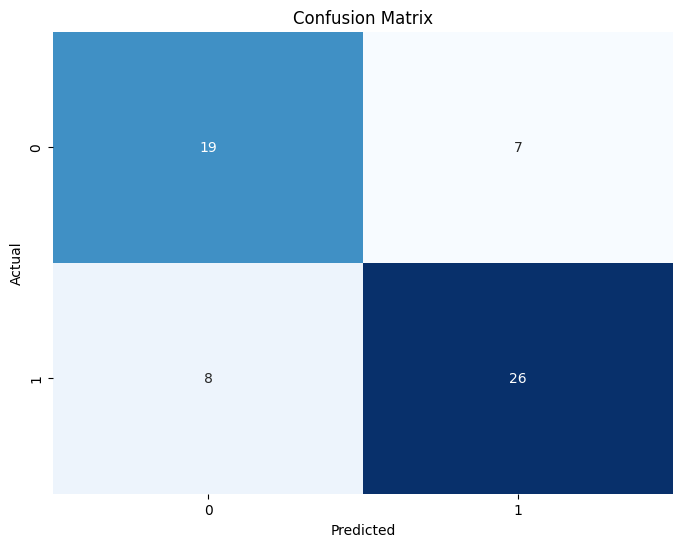

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

model = LogisticRegression(random_state=42)
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

## Accuracy score
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

#cross validation
scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validated Accuracy: {scores.mean():.2f} ± {scores.std():.2f}")


# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



### 2) Decision Tree

Classification Report:

              precision    recall  f1-score   support

           0       0.54      0.73      0.62        26
           1       0.72      0.53      0.61        34

    accuracy                           0.62        60
   macro avg       0.63      0.63      0.62        60
weighted avg       0.64      0.62      0.62        60

Accuracy Score: 0.62
Cross-Validated Accuracy: 0.73 ± 0.04


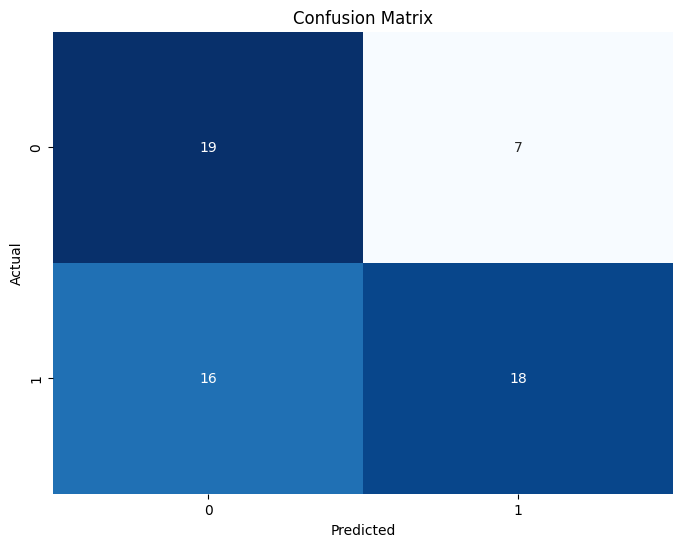

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

## Accuracy score
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2f}")

#cross validation
scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validated Accuracy: {scores.mean():.2f} ± {scores.std():.2f}")


# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 3) Random Forest

Classification Report:

              precision    recall  f1-score   support

           0       0.66      0.81      0.72        26
           1       0.82      0.68      0.74        34

    accuracy                           0.73        60
   macro avg       0.74      0.74      0.73        60
weighted avg       0.75      0.73      0.73        60

Accuracy Score: 0.73
Cross-Validated Accuracy: 0.80 ± 0.05


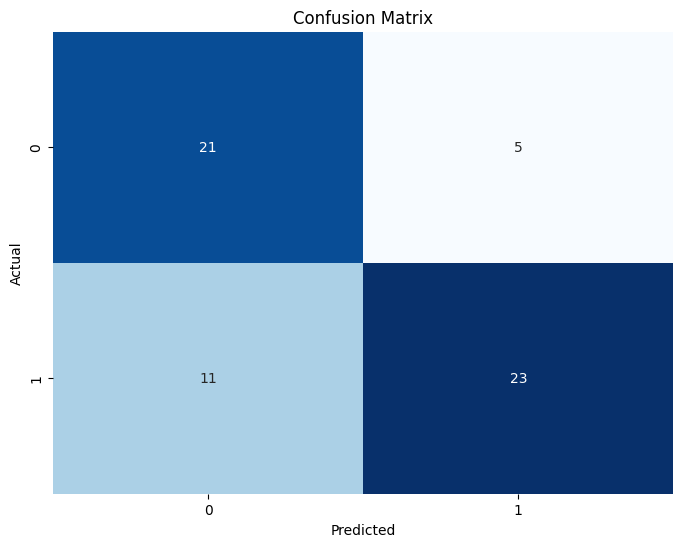

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

model = RandomForestClassifier(random_state=42)
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

## Accuracy score
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2f}")

#cross validation
scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validated Accuracy: {scores.mean():.2f} ± {scores.std():.2f}")


# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()